In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf

In [4]:
train = pd.read_csv("Kaggle\digit-recognizer\train.csv")
test = pd.read_csv("Kaggle\digit-recognizer\test.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train = train['label'].astype('float32')
X_train = train.drop(['label'], axis=1).astype('int32')
X_test = test.astype('float32')
X_train.shape, y_train.shape, X_test.shape

((42000, 784), (42000,), (28000, 784))

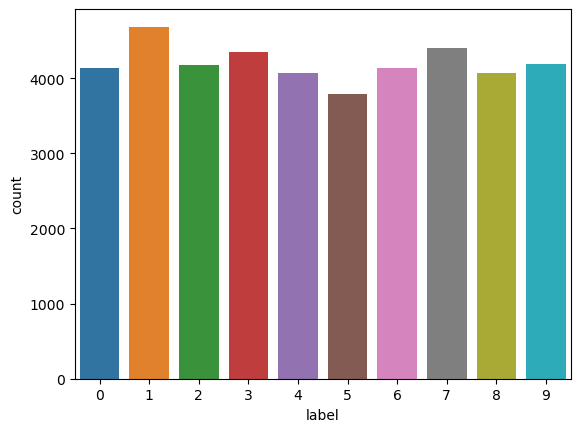

In [6]:
sns.countplot(x='label', data=train);

In [7]:
# Data normalization
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape, X_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [10]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_train.shape


(42000, 10)

In [11]:
print(train['label'].head())
y_train[0:5,:]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)

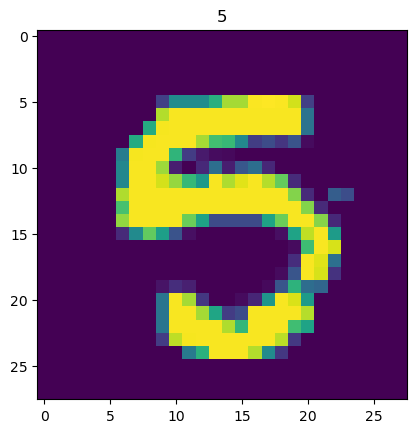

In [13]:
plt.imshow(X_train[1][:,:,0])
plt.title(y_train[1].argmax());

In [14]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [15]:
# Building a CNN model
input_shape = (28,28,1)
X_input = Input(input_shape)

# layer 1
x = Conv2D(64,(3,3),strides=(1,1),name='layer_conv1',padding='same')(X_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)
# layer 2
x = Conv2D(32,(3,3),strides=(1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)
# layer 3
x = Conv2D(32,(3,3),strides=(1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2), name='maxPool3')(x)
# fc
x = Flatten()(x)
x = Dense(64,activation ='relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation ='relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation ='softmax',name='fc2')(x)

conv_model = Model(inputs=X_input, outputs=x, name='Predict')
conv_model.summary()

Model: "Predict"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 layer_conv1 (Conv2D)        (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 maxPool1 (MaxPooling2D)     (None, 14, 14, 64)        0         
                                                                 
 layer_conv2 (Conv2D)        (None, 14, 14, 32)        18464     
                                                           

In [16]:
# Adam optimizer
conv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_cv,y_cv))


Epoch 1/10
378/378 [==============================] - 20s 50ms/step - loss: 0.5664 - accuracy: 0.8190 - val_loss: 2.8634 - val_accuracy: 0.2212
Epoch 2/10
378/378 [==============================] - 19s 49ms/step - loss: 0.1484 - accuracy: 0.9585 - val_loss: 0.0510 - val_accuracy: 0.9860
Epoch 3/10
378/378 [==============================] - 18s 48ms/step - loss: 0.1016 - accuracy: 0.9722 - val_loss: 0.0678 - val_accuracy: 0.9817
Epoch 4/10
378/378 [==============================] - 18s 48ms/step - loss: 0.0810 - accuracy: 0.9782 - val_loss: 0.0633 - val_accuracy: 0.9826
Epoch 5/10
378/378 [==============================] - 18s 48ms/step - loss: 0.0705 - accuracy: 0.9811 - val_loss: 0.0638 - val_accuracy: 0.9836
Epoch 6/10
378/378 [==============================] - 19s 50ms/step - loss: 0.0604 - accuracy: 0.9840 - val_loss: 0.0519 - val_accuracy: 0.9845
Epoch 7/10
378/378 [==============================] - 19s 49ms/step - loss: 0.0541 - accuracy: 0.9854 - val_loss: 0.0410 - val_accuracy:

In [18]:
# SGD optimizer
from tensorflow.keras.optimizers import SGD

sgd = SGD(learning_rate=0.0005, momentum=0.5, weight_decay=0.0, nesterov=False) 
conv_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
conv_model.fit(X_train, y_train, epochs=30, validation_data=(X_cv, y_cv))


Epoch 1/30
1182/1182 [==============================] - 22s 18ms/step - loss: 0.0302 - accuracy: 0.9912 - val_loss: 0.0294 - val_accuracy: 0.9919
Epoch 2/30
1182/1182 [==============================] - 21s 18ms/step - loss: 0.0257 - accuracy: 0.9926 - val_loss: 0.0274 - val_accuracy: 0.9919
Epoch 3/30
1182/1182 [==============================] - 22s 18ms/step - loss: 0.0242 - accuracy: 0.9935 - val_loss: 0.0268 - val_accuracy: 0.9929
Epoch 4/30
1182/1182 [==============================] - 22s 19ms/step - loss: 0.0249 - accuracy: 0.9930 - val_loss: 0.0268 - val_accuracy: 0.9924
Epoch 5/30
1182/1182 [==============================] - 21s 18ms/step - loss: 0.0232 - accuracy: 0.9930 - val_loss: 0.0261 - val_accuracy: 0.9921
Epoch 6/30
1182/1182 [==============================] - 23s 19ms/step - loss: 0.0207 - accuracy: 0.9946 - val_loss: 0.0262 - val_accuracy: 0.9924
Epoch 7/30
1182/1182 [==============================] - 21s 18ms/step - loss: 0.0212 - accuracy: 0.9940 - val_loss: 0.0260 -

In [19]:
y_pred = conv_model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
my_submission = pd.DataFrame({'ImageId': list(range(1, len(y_pred)+1)), 'Label': y_pred})
my_submission.to_csv('submission.csv', index=False)

875/875 [==============================] - 4s 5ms/step
